# Imports

These are the libraries needed for this notebook.

In [1]:
import jsonlines
import matplotlib.pyplot as plt
import os
import wordcloud
from nltk.corpus import stopwords
import copy
import re
from IPython.display import Image, display
from IPython.core.display import HTML
import string
import numpy as np
from tabulate import tabulate
import math
from scipy import stats

from datetime import datetime

# Tweet Counts

I visualized how many tweets from verified accounts each fake account had.

In [2]:
tweets_per_fake_account = {}

skiplist = [
    'realDonaldTrump'
]



for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
            
                tweets_per_fake_account.setdefault( fake_account_name, [] ).append(obj)


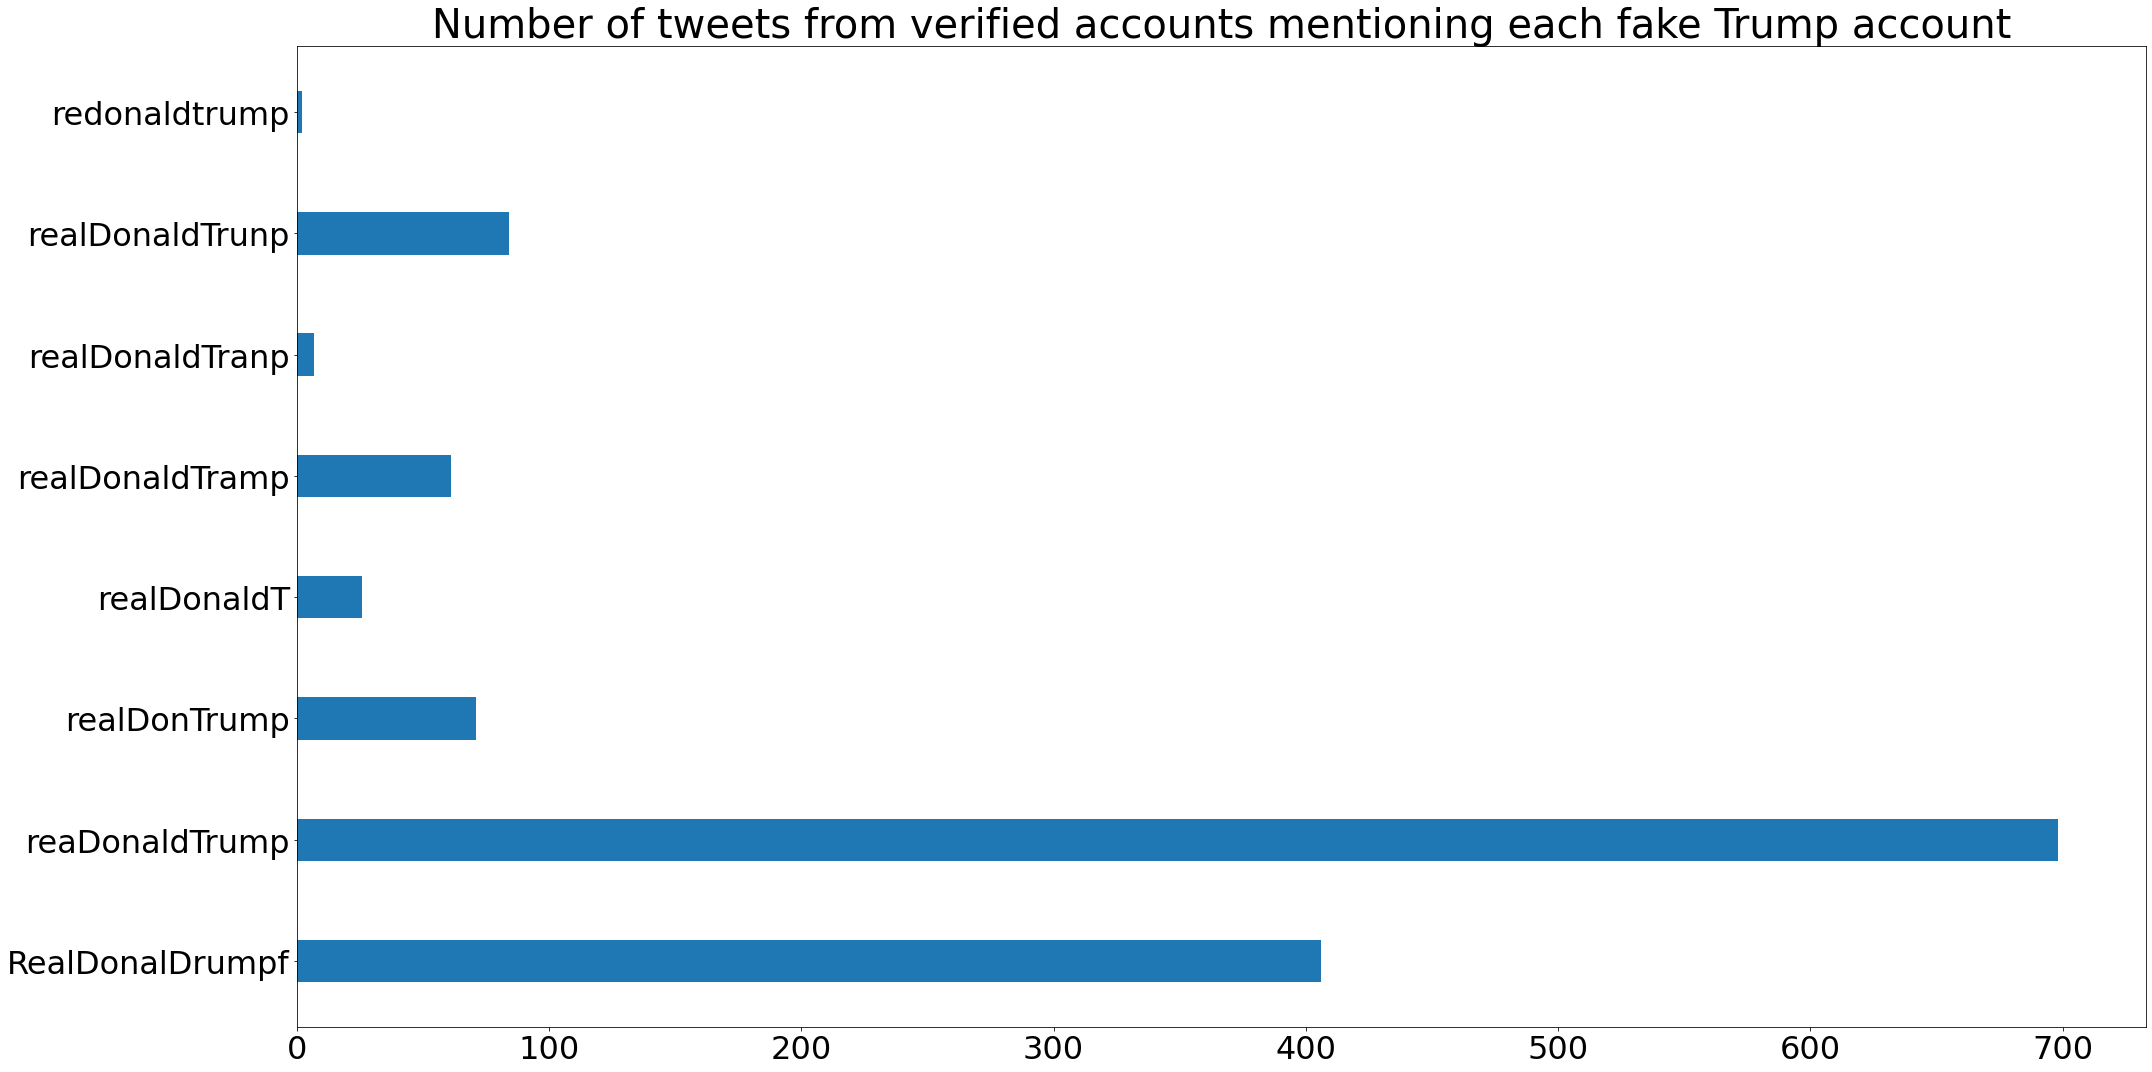

In [3]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(tweets_per_fake_account) )

labels = []
counts = []
width = 0.35

for fake_account in sorted(tweets_per_fake_account):
    
    labels.append( fake_account )
    counts.append( len( tweets_per_fake_account[fake_account] ) )
                   
rects1 = ax.barh(x, counts, width)

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

# ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(32) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(32) 

plt.title(
    "Number of tweets from verified accounts mentioning each fake Trump account",
    fontsize=40)
        
fig.tight_layout()

plt.show()


In [4]:
for fake_account in sorted(tweets_per_fake_account):
    
    print("{}: {}".format( fake_account, len( tweets_per_fake_account[fake_account] ) ) )

RealDonalDrumpf: 406
reaDonaldTrump: 698
realDonTrump: 71
realDonaldT: 26
realDonaldTramp: 61
realDonaldTranp: 7
realDonaldTrunp: 84
redonaldtrump: 2


# Verified Accounts Count

I visualized how many unique verified accounts existed among those tweets.

In [5]:
verified_accounts_per_fake_account = {}

skiplist = [
    'realDonaldTrump'
]



for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
            
                verified_accounts_per_fake_account.setdefault( fake_account_name, [] ).append(obj ['username'] )


In [6]:
for fake_account in sorted(verified_accounts_per_fake_account):
    
    print("{}: {}".format( fake_account, len( set( verified_accounts_per_fake_account[fake_account] ) ) ) )

RealDonalDrumpf: 224
reaDonaldTrump: 473
realDonTrump: 63
realDonaldT: 21
realDonaldTramp: 45
realDonaldTranp: 6
realDonaldTrunp: 36
redonaldtrump: 2


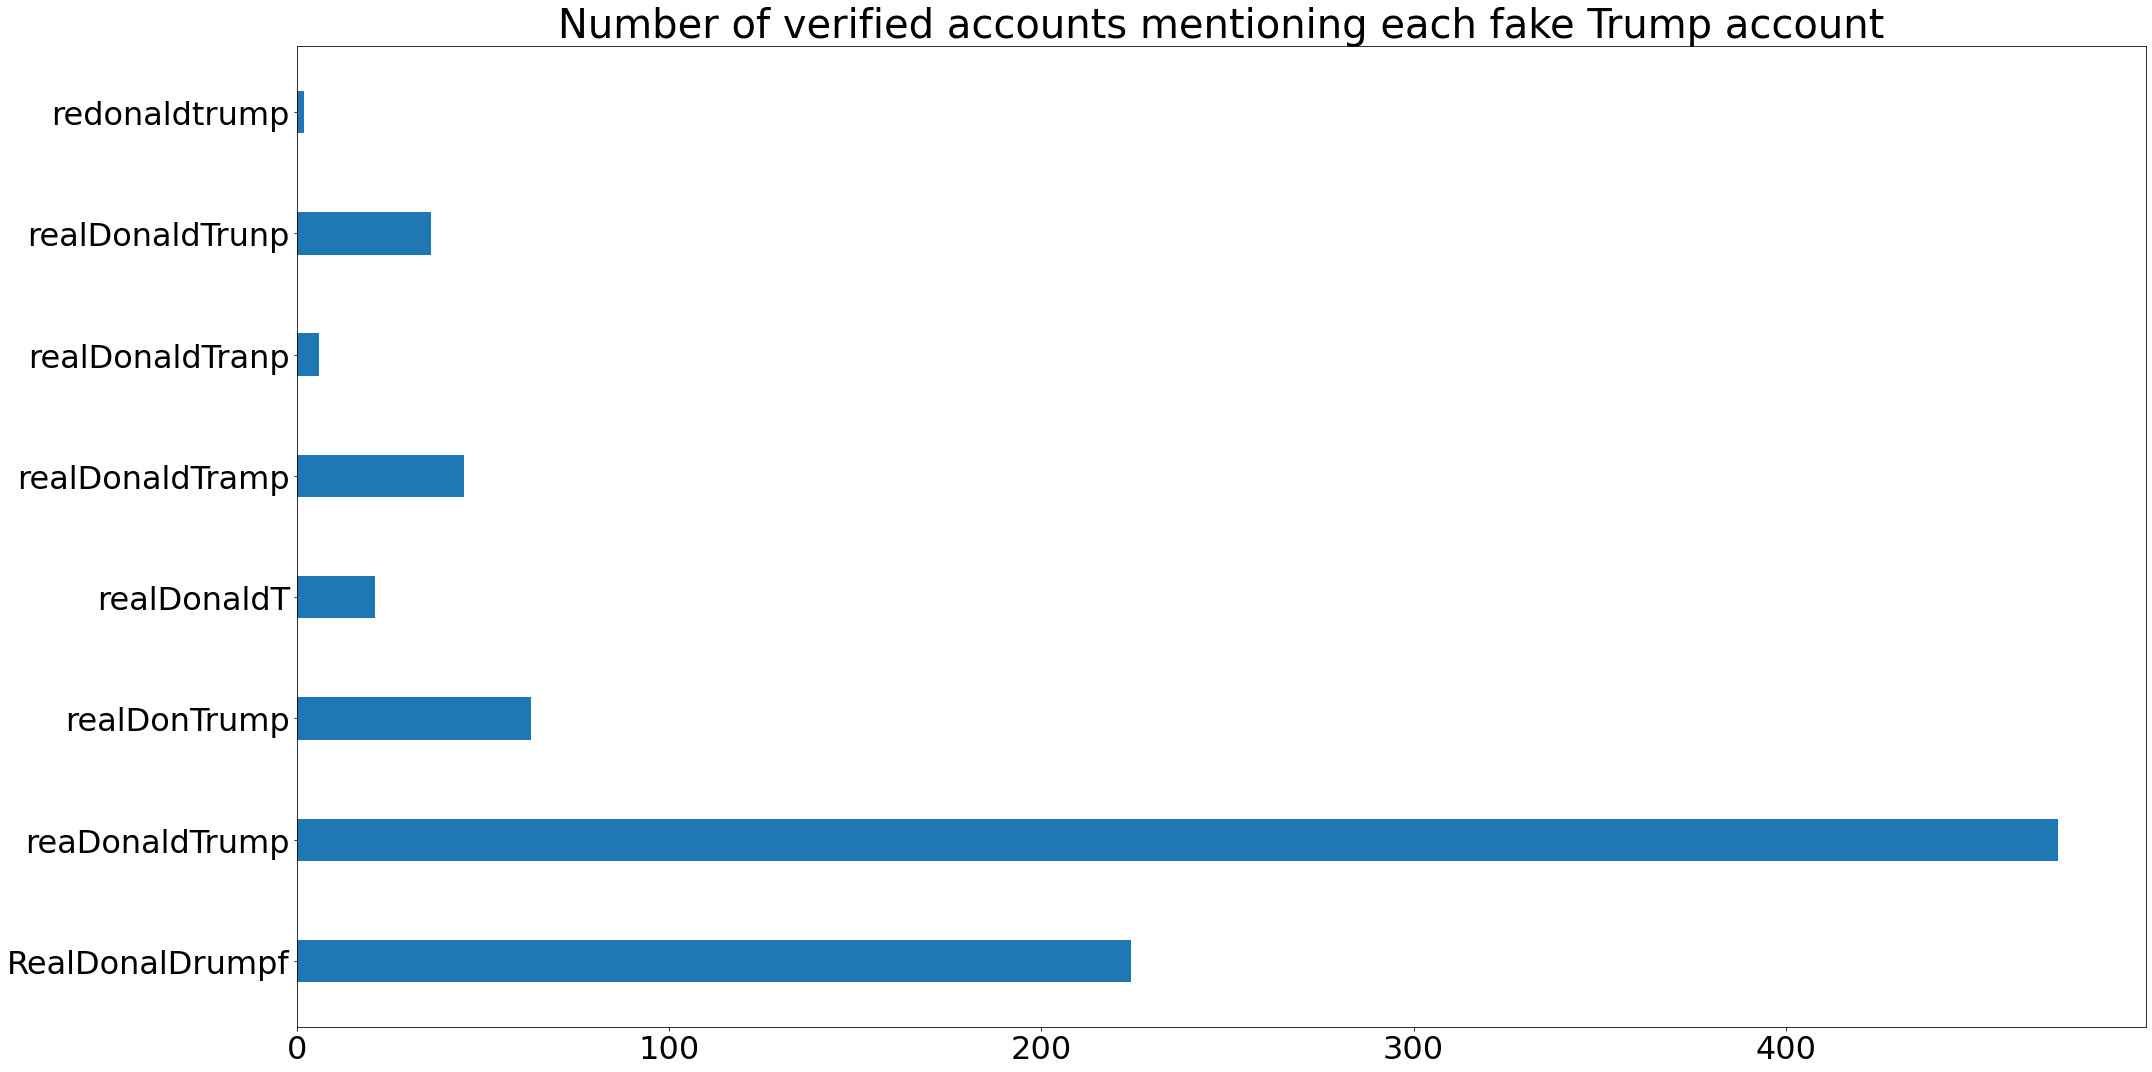

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(verified_accounts_per_fake_account) )

labels = []
counts = []
width = 0.35

for fake_account in sorted(verified_accounts_per_fake_account):
    
    labels.append( fake_account )
    counts.append( len( set( verified_accounts_per_fake_account[fake_account] ) ) )
                   
rects1 = ax.barh(x, counts, width)

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

# ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(32) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(32) 

plt.title(
    "Number of verified accounts mentioning each fake Trump account",
    fontsize=40)
        
fig.tight_layout()

plt.show()


# Tweets over time

Here I wanted to break down the tweets over time and discovered that some fake accounts were created after their misspellings had been tweeted by verified accounts.

In [8]:
fake_account_to_tweet_timestamp = {}

skiplist = [
    'realDonaldTrump'
]

for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
                
                created_at = datetime.strptime(obj['created_at'], "%Y-%m-%d %H:%M:%S %Z")
                
                fake_account_to_tweet_timestamp.setdefault(fake_account_name, []).append( created_at )
#                 username = obj['username']
#                 language = obj['language']
#                 tweet = obj['tweet']
                                               
                                               
                                               

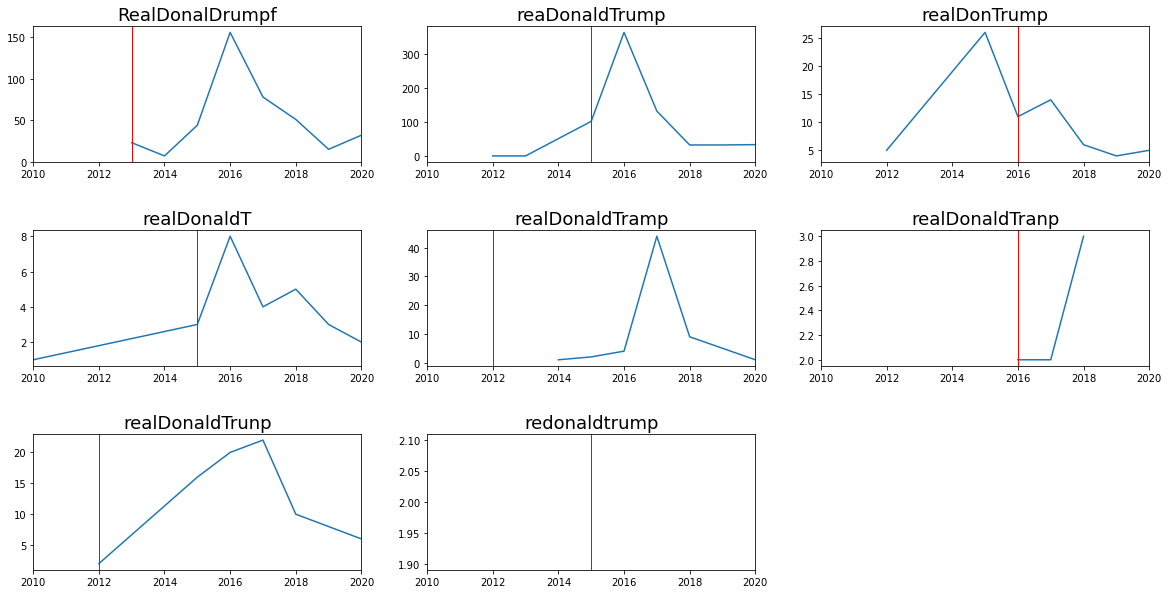

In [9]:
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(10)

figcounter = 0
row = 0
col = 0

account_creation_year = {
    "RealDonalDrumpf": 2013,
    "reaDonaldTrump": 2015,
    "realDonTrump": 2016,
    "realDonaldT": 2015,
    "realDonaldTrunp": 2012,
    "realDonaldTramp": 2012,
    "realDonaldTranp": 2016,
    "redonaldtrump": 2015
}

for fake_account_name in sorted(fake_account_to_tweet_timestamp):

#     fake_account_name = 'reaDonaldTrump'

    count_per_month = {}
    
    x = []
    y = []
    
    # vertical line for account creation date

    for creation_time in fake_account_to_tweet_timestamp[fake_account_name]:
        count_per_month.setdefault( creation_time.year, 0 )
        count_per_month[
            creation_time.year
        ] += 1

    
    for year in count_per_month:
        x.append(year)
        y.append(count_per_month[year])
    
#     if row == 0:
#         row = 0
    
#     elif col % 3 == 0:
#         row += 1
#         col = 0

#     else:
#         col += 1
        
#     print('row: {}'.format(row))
#     print('col: {}'.format(col))
#     print()
        
    axs[row, col].plot(x, y)
    axs[row, col].set_xlim( 2010, 2020 )
#     axs[row, col].set_ylim( 0, 400 )
    axs[row, col].set_title(fake_account_name, fontsize=18)
    axs[row, col].xaxis.label.set_fontsize(16)
    axs[row, col].axvline(x=account_creation_year[fake_account_name], linewidth=1, color='r')

    col += 1
    
    if col == 3:
        row += 1
        col = 0
        
    figcounter += 1
    
axs[2, 2].set_visible(False)
plt.subplots_adjust(hspace=0.5)

# Word Clouds of Different Accounts

Here I was trying to find out if the conversations were different among the verified accounts that mentioned each fake account. This did not make it into the slides because I didn't see anything interesting here.

In [10]:
from nltk.corpus import stopwords

fake_account_to_tweet_text = {}

skiplist = [
    'realDonaldTrump'
]

stopwords = list( stopwords.words('english') )
stopwords.extend([
    'http',
    'https',
    'trump',
    'amp',
    'tweet',
    'gt',
    'co',
    'da',
    'realdonaldtrump',
    'donald',
    'de',
    'la',
    'el',
    'le',
    'un',
    'et',
    'que',
    'su'
])

for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
#         if filename != 'reaDonaldTrump.json':
#             continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
                
                stopwords_local = copy.deepcopy( stopwords )
                stopwords_local.append( fake_account_name.lower().strip() )
#                 stopwords_local.append( '@' + fake_account_name.lower() )

                words = []
    
                tweet_text = obj['tweet']
        
                tweet_text = re.sub( 'https://t.co/[A-Za-z0-9]', '', tweet_text ).replace(chr(8203), '')
        
#                 for url in obj['urls']:
#                     tweet_text = tweet_text.replace(url, '')

                for w in re.split( '[' + string.punctuation + ' ’\t\n…”]', tweet_text.lower() ):

                    if len(w.strip()) != 0:

                        if w.lower().strip() not in stopwords_local:
                        
#                             if fake_account_name.lower() in w.lower().strip():
#                                 print("tweet text: [{}]".format(tweet_text))
#                                 print("word: [{}]".format(w))
#                                 print(fake_account_name.lower() in stopwords_local)
#                                 print(w.lower().strip() not in stopwords_local)
#                                 print(stopwords_local)
#                                 for i in range(0, len(w)):
#                                     try:
#                                         print("{} == {}".format(
#                                             w[i].lower(),
#                                             fake_account_name[i].lower(),
#                                             w[i].lower() == fake_account_name[i].lower()
#                                         ))
#                                     except IndexError:
#                                         print("{} is value {}".format( w[i],  ord(w[i])))
                                    
#                                 print(fake_account_name.lower().strip() == w.lower().strip())
#                                 sys.exit(255)
                        
                            words.append(w.lower())
                
                fake_account_to_tweet_text.setdefault( fake_account_name, [] ).extend( words )                                               
                                               
                                               

RealDonalDrumpf


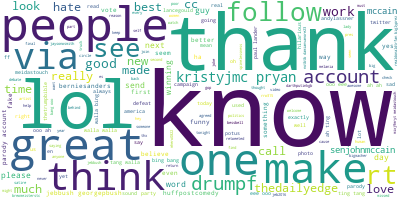

reaDonaldTrump


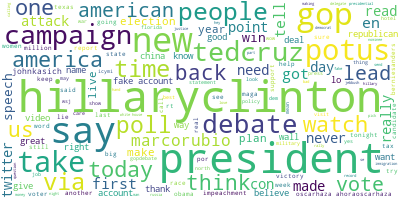

realDonTrump


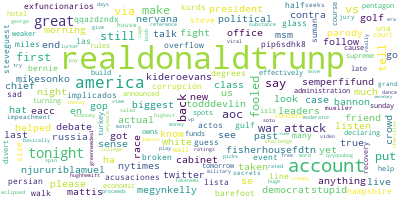

realDonaldT


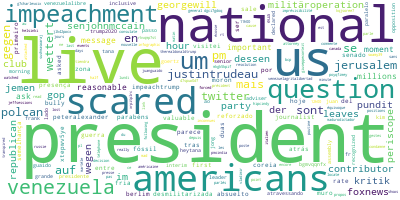

realDonaldTramp


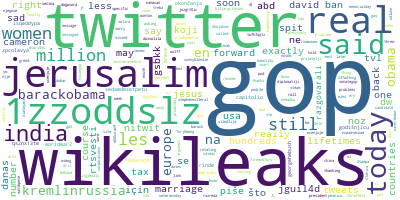

realDonaldTranp


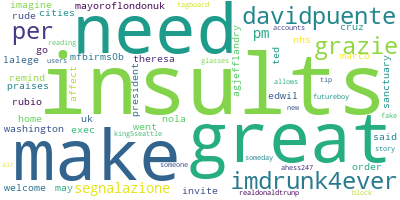

realDonaldTrunp


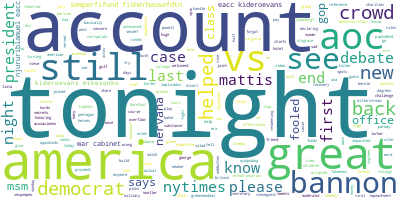

redonaldtrump


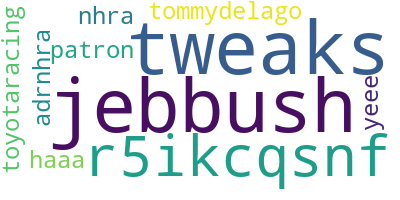

In [11]:
for fake_account in sorted(fake_account_to_tweet_text):
    
#     if fake_account != 'reaDonaldTrump':
#         continue

    wc = wordcloud.WordCloud(colormap="viridis", background_color="white")
    text = ' '.join( fake_account_to_tweet_text[fake_account] )
    wc.generate(text)
    print(fake_account)
    display(wc.to_image())

## Verified Account Data

Here we are loading data for the next few runs.

In [12]:
verified_accountids_per_fake_account = {}
verified_account_names_per_fake_account = {}

for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
                
                verified_accountids_per_fake_account.setdefault( fake_account_name, [] ).append( obj['user_id'] )
                verified_account_names_per_fake_account.setdefault( fake_account_name, []).append( obj['username'] )

verified_account_info = {}
                
with jsonlines.open("../verified-account-data/all-verified-follower-account-info.jsonl") as f:

    for obj in f:
        
        verified_account_info[ obj['id'] ] = obj

## Overlapping Verified Accounts

I was interested in how often the same verified account used different fake accounts.

In [13]:
sorted(list(verified_account_names_per_fake_account.keys()))

['RealDonalDrumpf',
 'reaDonaldTrump',
 'realDonTrump',
 'realDonaldT',
 'realDonaldTramp',
 'realDonaldTranp',
 'realDonaldTrunp',
 'redonaldtrump']

In [14]:

set(list(verified_account_names_per_fake_account['RealDonalDrumpf'])).intersection(
    set(list(verified_account_names_per_fake_account['reaDonaldTrump']))
)


{'amerindependent',
 'charles_gaba',
 'harveyjkaye',
 'joejohnsononair',
 'lopezgovlaw',
 'mollyjongfast',
 'solomonjones1',
 'starmakerbolin',
 'taradublinrocks',
 'tomiahonen',
 'tw_nextmedia'}

In [15]:

set(list(verified_account_names_per_fake_account['reaDonaldTrump'])).intersection(
    set(list(verified_account_names_per_fake_account['realDonTrump']))
)


{'amyalaporte', 'chadlivengood', 'heytana', 'hughhewitt'}

In [16]:

set(list(verified_account_names_per_fake_account['realDonTrump'])).intersection(
    set(list(verified_account_names_per_fake_account['realDonaldT']))
)


set()

In [17]:

set(list(verified_account_names_per_fake_account['realDonTrump'])).intersection(
    set(list(verified_account_names_per_fake_account['realDonaldT']))
)


set()

In [75]:
matrix = []

for fake_account_name1 in sorted(verified_account_names_per_fake_account.keys()):
    
    row = []
    
    for fake_account_name2 in sorted(verified_account_names_per_fake_account.keys()):
        
        if verified_account_names_per_fake_account[fake_account_name1] == verified_account_names_per_fake_account[fake_account_name2]:
            
            row.append(0)
            
        else:
            
            row.append(
                len(
                    set(list( verified_account_names_per_fake_account[fake_account_name1] )).intersection(
                        set(list( verified_account_names_per_fake_account[fake_account_name2] ))
                    )
                )
            )
            
    matrix.append(row)
        
names = sorted(verified_account_names_per_fake_account.keys())

from chord import Chord

Chord(matrix, names, wrap_labels=False, width=1000, font_size_large="8px").show()

## Followers per Verified Account

Here we process the follower data for each verified account.

In [19]:
followers_per_verified_per_fake = {}

for fake_account in verified_accountids_per_fake_account:
    
    for account_id in verified_accountids_per_fake_account[fake_account]:
        
        followers_per_verified_per_fake.setdefault( fake_account, [] ).append(
            verified_account_info[account_id]['followers_count']
        )

In [20]:
table = []

headers = [
    "fake account",
    "minimum # of followers for a tweeting verified account",
    "maximum # of followers for a tweeting verified account",
    "mean # of followers for a tweeting verified account",
    "std dev of followers for a tweeting verified account",
    "median # of followers for a tweeting verified account",
]

for fake_account in sorted(followers_per_verified_per_fake):
    
    row = []
    row.append( fake_account )
    row.append( np.min( followers_per_verified_per_fake[fake_account] ) )
    row.append( np.max( followers_per_verified_per_fake[fake_account] ) )
    row.append( math.floor( np.mean( followers_per_verified_per_fake[fake_account] ) ) )
    row.append( np.std( followers_per_verified_per_fake[fake_account] ) )
    row.append( np.median( followers_per_verified_per_fake[fake_account] ) )
    
    table.append(row)
    
display(HTML(tabulate(table, headers, tablefmt="html")))

fake account,minimum # of followers for a tweeting verified account,maximum # of followers for a tweeting verified account,mean # of followers for a tweeting verified account,std dev of followers for a tweeting verified account,median # of followers for a tweeting verified account
RealDonalDrumpf,461,8.72758e+07,319082,4.33121e+06,22484
reaDonaldTrump,399,1.9837e+07,507497,1.72154e+06,59393.5
realDonTrump,3387,1.83479e+06,176019,341545,38854
realDonaldT,866,243146,85045,92035.1,35544.5
realDonaldTramp,1138,1.63011e+06,112719,242141,35141
realDonaldTranp,4024,1.47706e+06,230487,509365,20529
realDonaldTrunp,3387,1.27025e+06,176631,305032,40063
redonaldtrump,20529,24379,22454,1925,22454


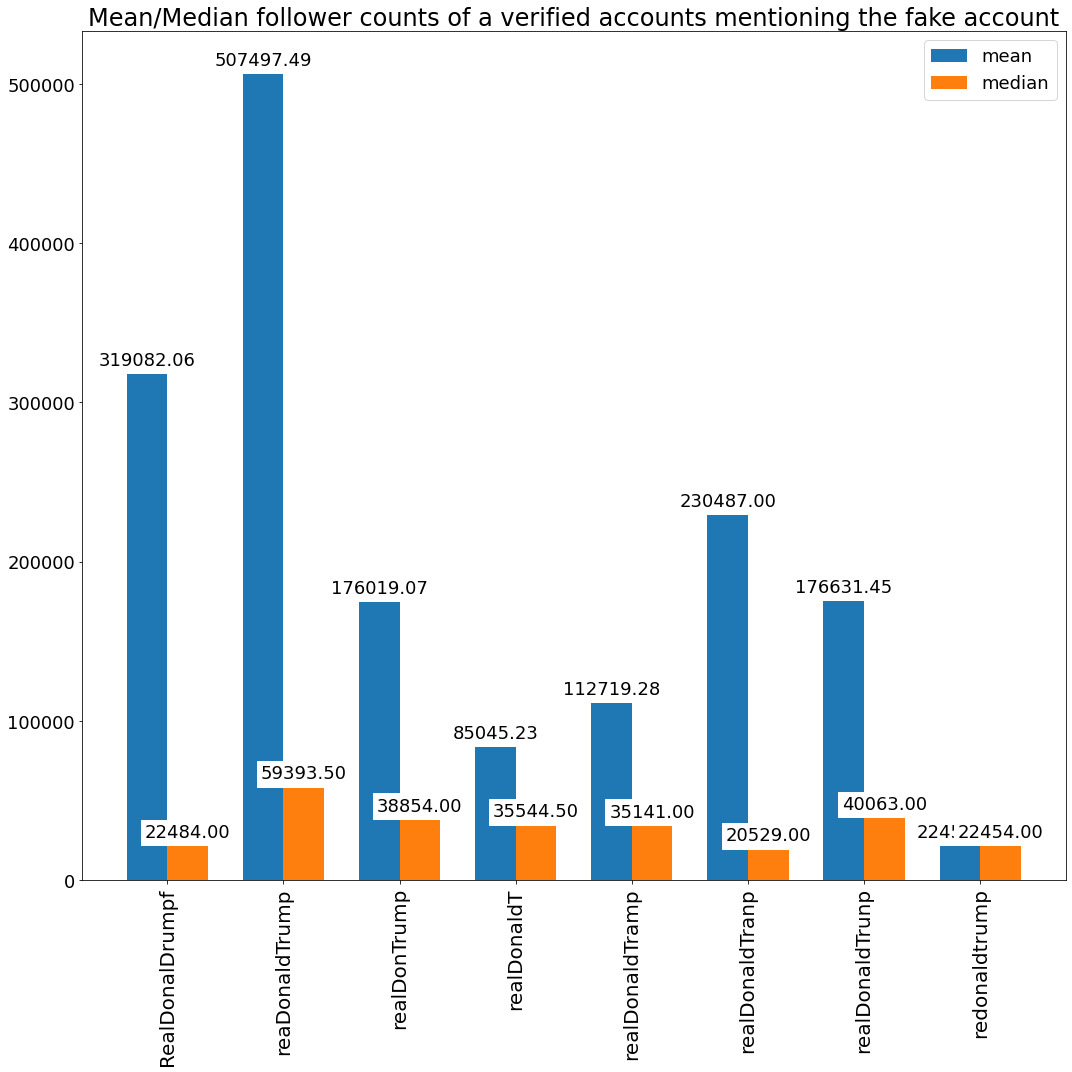

In [21]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)

x = np.arange( 0, len(followers_per_verified_per_fake) )

labels = []
means = []
medians = []

width = 0.35

for fake_account in sorted(followers_per_verified_per_fake):
    
    labels.append( fake_account )
    means.append( np.mean( followers_per_verified_per_fake[fake_account] ) )
    medians.append( np.median( followers_per_verified_per_fake[fake_account] ) )
                   
rects1 = ax.bar(x - width/2, means, width=width, label='mean')
rects2 = ax.bar(x + width/2, medians, width=width, label='median')

ax.set_xticks(x)
plt.xticks(rotation='vertical')
ax.set_xticklabels(labels, fontsize=20)
ax.legend(fontsize=18)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                   fontsize=18,
                   backgroundcolor="w")

autolabel(rects1)
autolabel(rects2)

plt.title("Mean/Median follower counts of a verified accounts mentioning the fake account", fontsize=24)
        
fig.tight_layout()

plt.show()


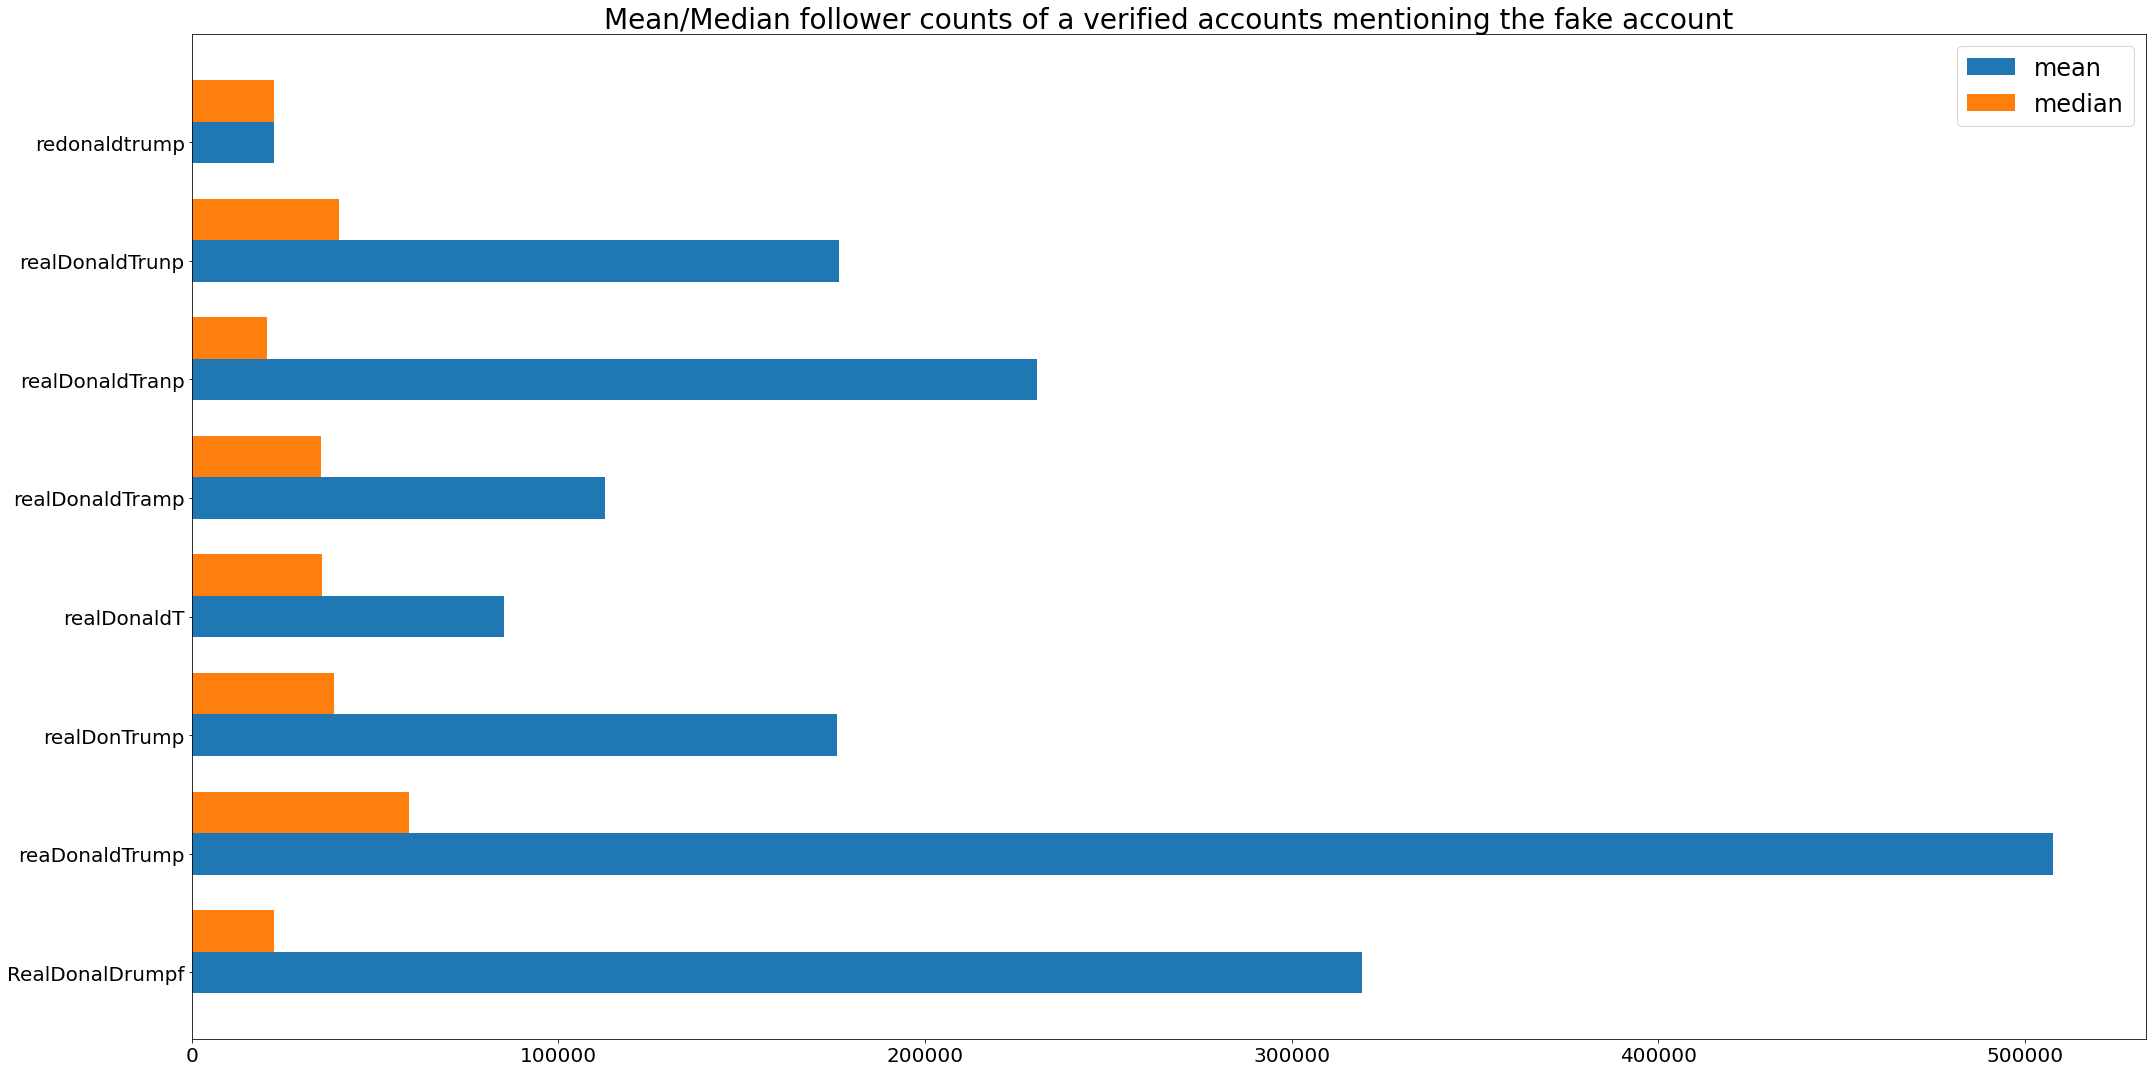

In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(followers_per_verified_per_fake) )

labels = []
means = []
medians = []

width = 0.35

for fake_account in sorted(followers_per_verified_per_fake):
    
    labels.append( fake_account )
    means.append( np.mean( followers_per_verified_per_fake[fake_account] ) )
    medians.append( np.median( followers_per_verified_per_fake[fake_account] ) )
                   
rects1 = ax.barh(x, means, width, label='mean')
rects2 = ax.barh(x + width, medians, width, label='median')

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

# ax.set_xticks(x)
# plt.xticks(rotation='vertical')
# ax.set_xticklabels(labels, fontsize=20)
ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{:.2f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',
#                    fontsize=18,
#                    backgroundcolor="w")

# autolabel(rects1)
# autolabel(rects2)

plt.title(
    "Mean/Median follower counts of a verified accounts mentioning the fake account",
    fontsize=28)
        
fig.tight_layout()

plt.show()


RealDonalDrumpf


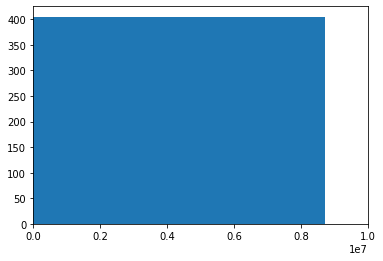

reaDonaldTrump


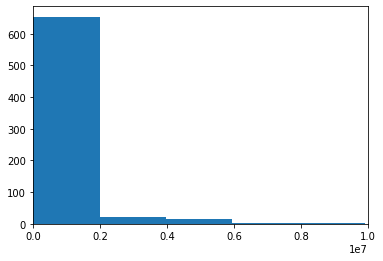

realDonTrump


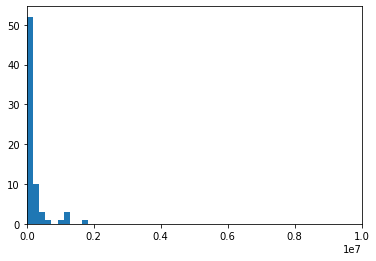

realDonaldT


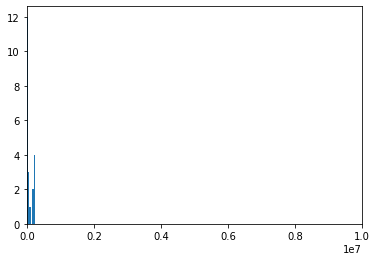

realDonaldTramp


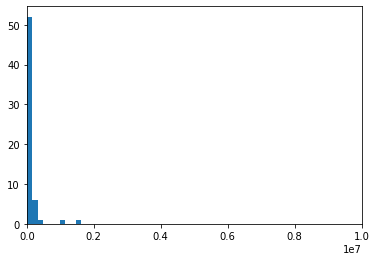

realDonaldTranp


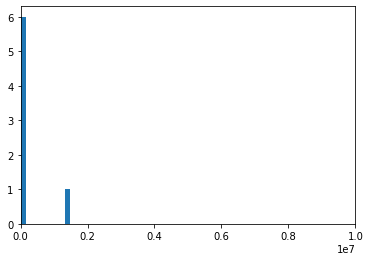

realDonaldTrunp


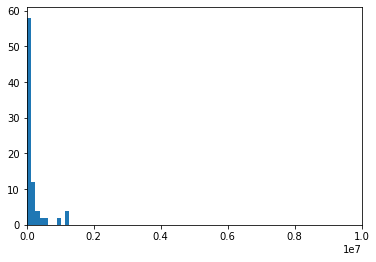

redonaldtrump


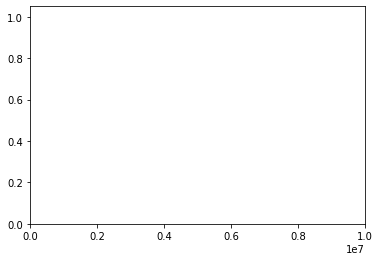

In [23]:
for fake_account in sorted(followers_per_verified_per_fake):
    print(fake_account)
    plt.hist( followers_per_verified_per_fake[fake_account] )
    plt.xlim(0, 10000000)
    plt.show()

RealDonalDrumpf


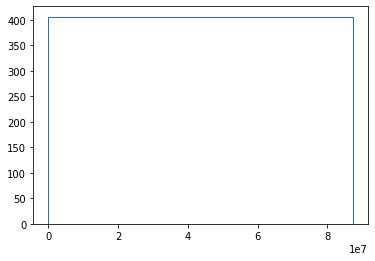

reaDonaldTrump


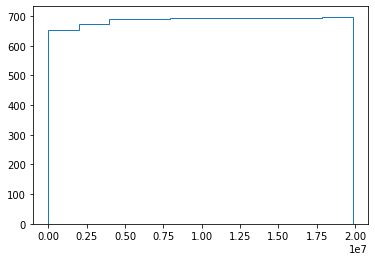

realDonTrump


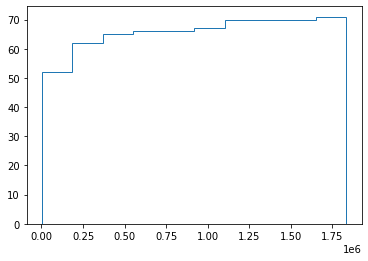

realDonaldT


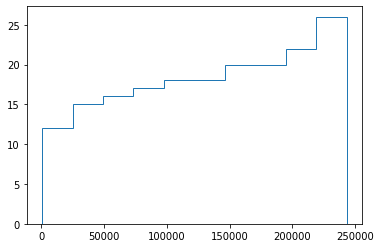

realDonaldTramp


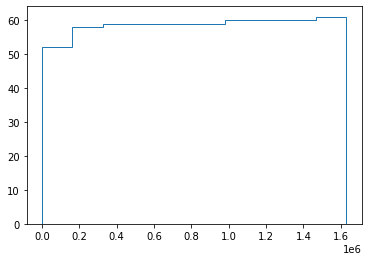

realDonaldTranp


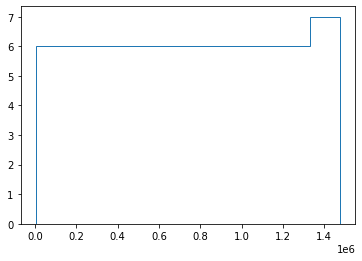

realDonaldTrunp


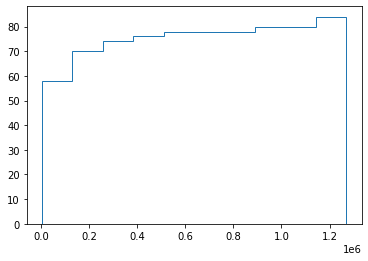

redonaldtrump


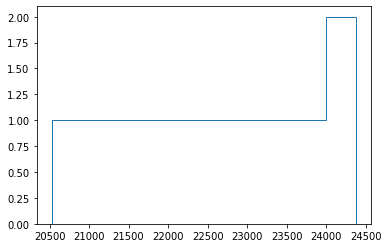

In [24]:
for fake_account in sorted(followers_per_verified_per_fake):
    print(fake_account)
    plt.hist( followers_per_verified_per_fake[fake_account], cumulative=True, histtype='step' )
    plt.show()

## Retweets/likes of accounts that tried to warn about fake account

Here we look at when verified accounts try to warn other that the Trump account is fake.

In [25]:
fake_account_to_tweet_timestamp = {}

skiplist = [
    'realDonaldTrump'
]

fake_account_strings = [
    "fake Trump account",
    "fake account",
    "parody account",
    "not the real Trump account",
    "not his real account",
    "#fakeaccount"
]

warning_tweets_by_fake_account = {}
nonwarning_tweets_by_fake_account = {}

warning_verified_accounts = []
warning_retweets_by_fake_account = {}
warning_likes_by_fake_account = {}
warning_replies_by_fake_account = {}

nonwarning_verified_accounts = []
nonwarning_retweets_by_fake_account = {}
nonwarning_likes_by_fake_account = {}
nonwarning_replies_by_fake_account = {}

                
all_replies_by_fake_account = {}
all_likes_by_fake_account = {}
all_retweets_by_fake_account = {}

total_tweets_per_fake_account = {}

for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
            
        print()
        print(fake_account_name)
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
                
                warned_users = False
                
                for fake_account_string in fake_account_strings:
                
                    if fake_account_string in obj['tweet']:
                        print("::" + fake_account_string)
                        print(obj['tweet'])
                        warning_tweets_by_fake_account.setdefault( fake_account_name, [] ).append(obj)
                        warning_retweets_by_fake_account.setdefault( fake_account_name, []).append(
                            obj['retweets_count']
                        )
                        warning_likes_by_fake_account.setdefault( fake_account_name, []).append(
                            obj['likes_count']
                        )
                        warning_replies_by_fake_account.setdefault( fake_account_name, []).append(
                            obj['replies_count']
                        )
                        warning_verified_accounts.append( obj['username'] )
                        warned_users = True
                        break
                
                if warned_users == False:
                    nonwarning_tweets_by_fake_account.setdefault( fake_account_name, [] ).append(obj)
                    nonwarning_retweets_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['retweets_count']
                    )
                    nonwarning_likes_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['likes_count']
                    )
                    nonwarning_replies_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['replies_count']
                    )
                
                total_tweets_per_fake_account.setdefault( fake_account_name, 0)
                total_tweets_per_fake_account[fake_account_name] += 1
                
                all_replies_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['replies_count']
                )
                all_likes_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['likes_count']
                )
                all_retweets_by_fake_account.setdefault( fake_account_name, [] ).append(
                        obj['retweets_count']
                )

                                               


reaDonaldTrump
::#fakeaccount
@Ran_Twit_User @reaDonaldTrump thx. #fakeaccount #fakenews real @realDonaldTrump
::not the real Trump account
@SerenaRLee @reaDonaldTrump @RyanLizza That's not the real Trump account.
::fake account
@mtompy @reaDonaldTrump @kenvogel damn they got me again. Twitter needs to be rid of these fake accounts. So annoying. $twtr @jack
::fake account
@nahaltoosi @reaDonaldTrump fake account...
::fake account
@conniewhitehome @brianstelter @reaDonaldTrump  it's a fake account though.
::fake account
@reaDonaldTrump: Darn, here I thought Trump actually followed me but it was a fake account! You caught me courtesy of sleep deprivation!
::fake account
@ItsDavidFord @reaDonaldTrump @ron_fournier @Timodc @JebBush @realDonaldTrump fake account
::fake account
@matthewjdowd @reaDonaldTrump @ron_fournier @Timodc @JebBush @realDonaldTrump well now I'm learning it's a fake account
::parody account
Another debate PSA - @reaDonaldTrump is a parody account
::parody account
@reaD

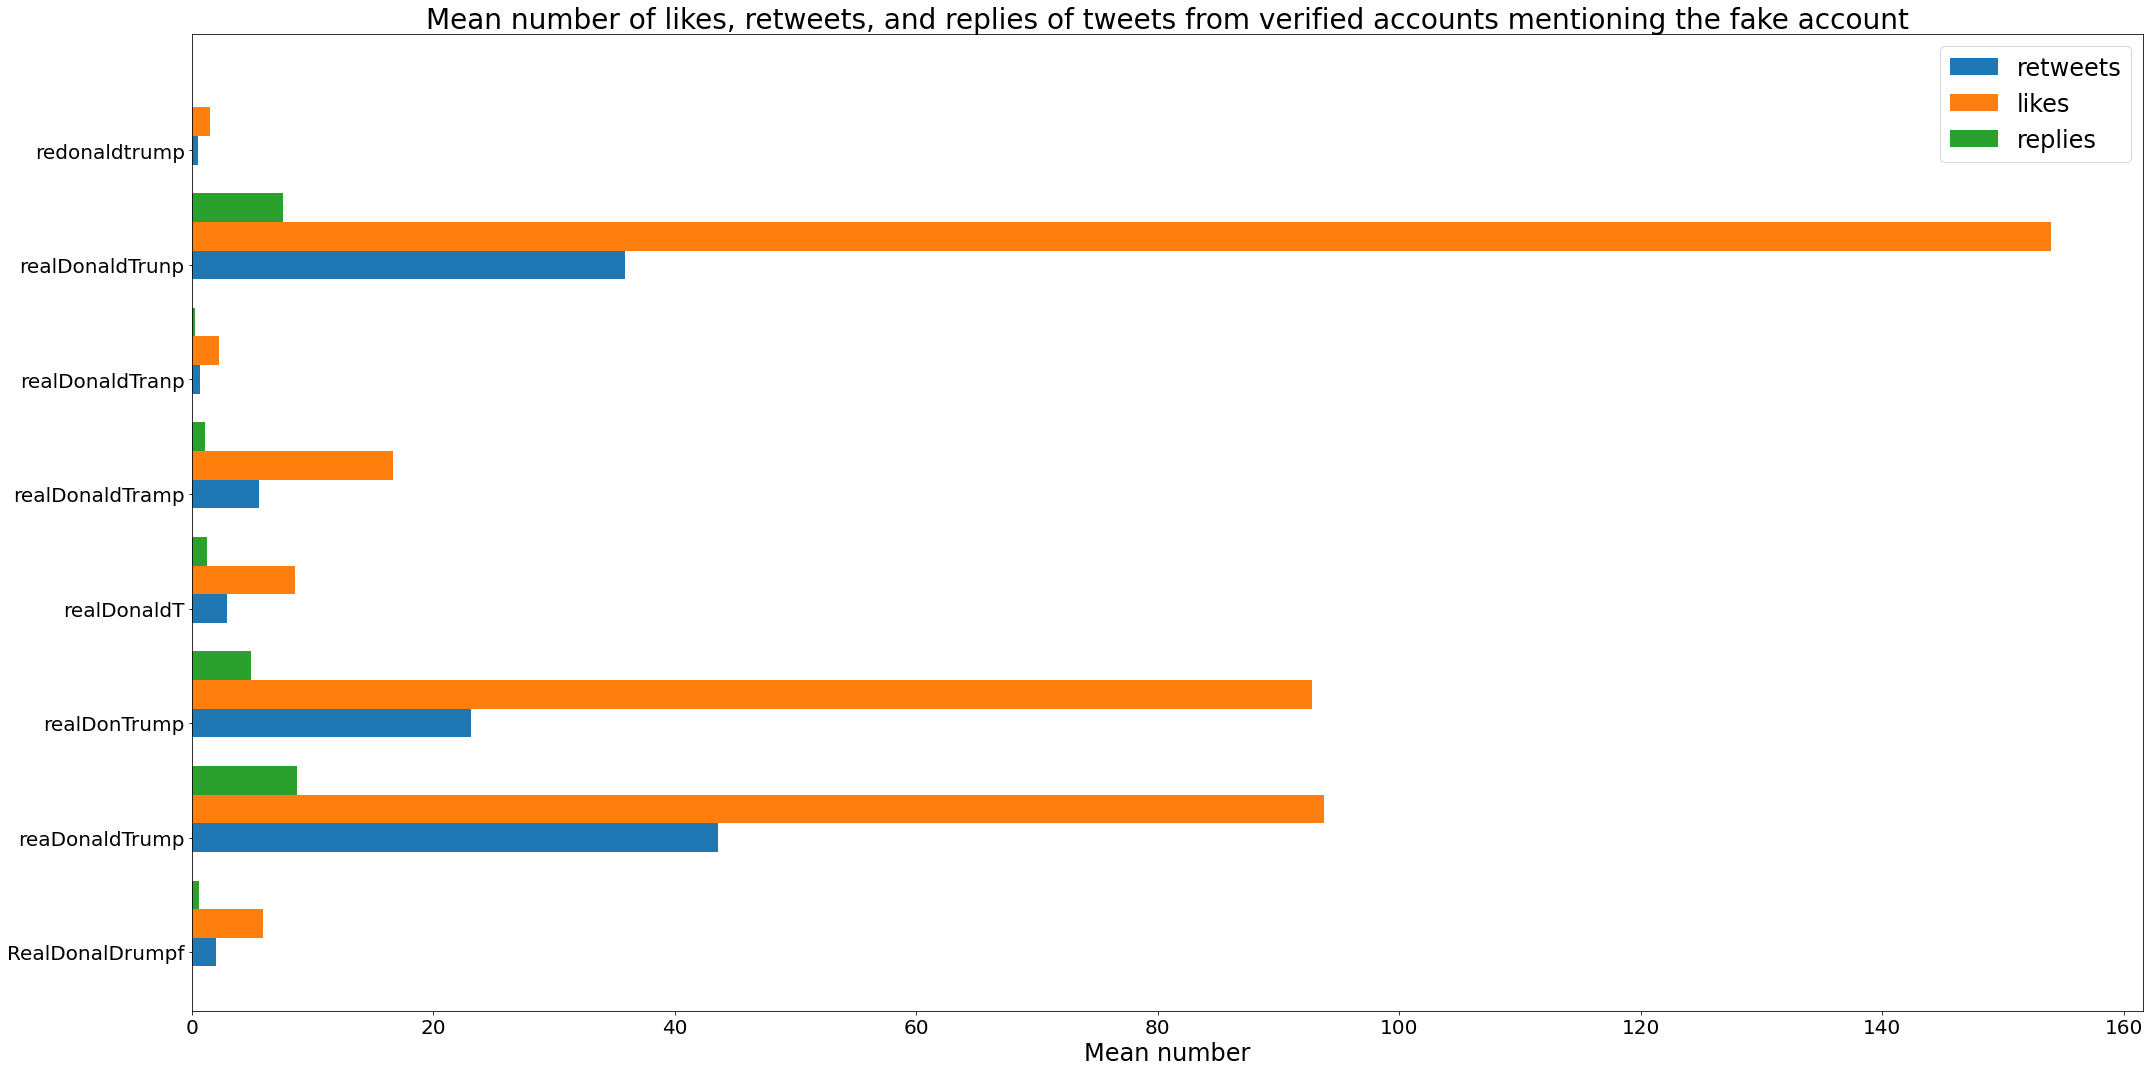

In [26]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(followers_per_verified_per_fake) )

labels = []

replies = []
likes = []
retweets = []

# width = 0.35
width = 0.25

for fake_account in sorted(followers_per_verified_per_fake):
    
    labels.append( fake_account )
    replies.append( np.mean( all_replies_by_fake_account[fake_account] ) )
    retweets.append( np.mean( all_retweets_by_fake_account[fake_account] ) )
    likes.append( np.mean( all_likes_by_fake_account[fake_account] ) )
                   
ax.barh(x, retweets, width, label='retweets', align='center')
ax.barh(x + width, likes, width, label='likes', align='center')
ax.barh(x + (2 * width), replies, width, label='replies', align='center')
# ax.barh( x + (3 * width), [0] * len(likes), width, align='center', label='nada')

# ax.axhline( x + (2 * width), color='black' )

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

plt.title(
    "Mean number of likes, retweets, and replies of tweets from verified accounts mentioning the fake account",
    fontsize=28)

plt.xlabel("Mean number", fontsize=24)
        
fig.tight_layout()

plt.show()


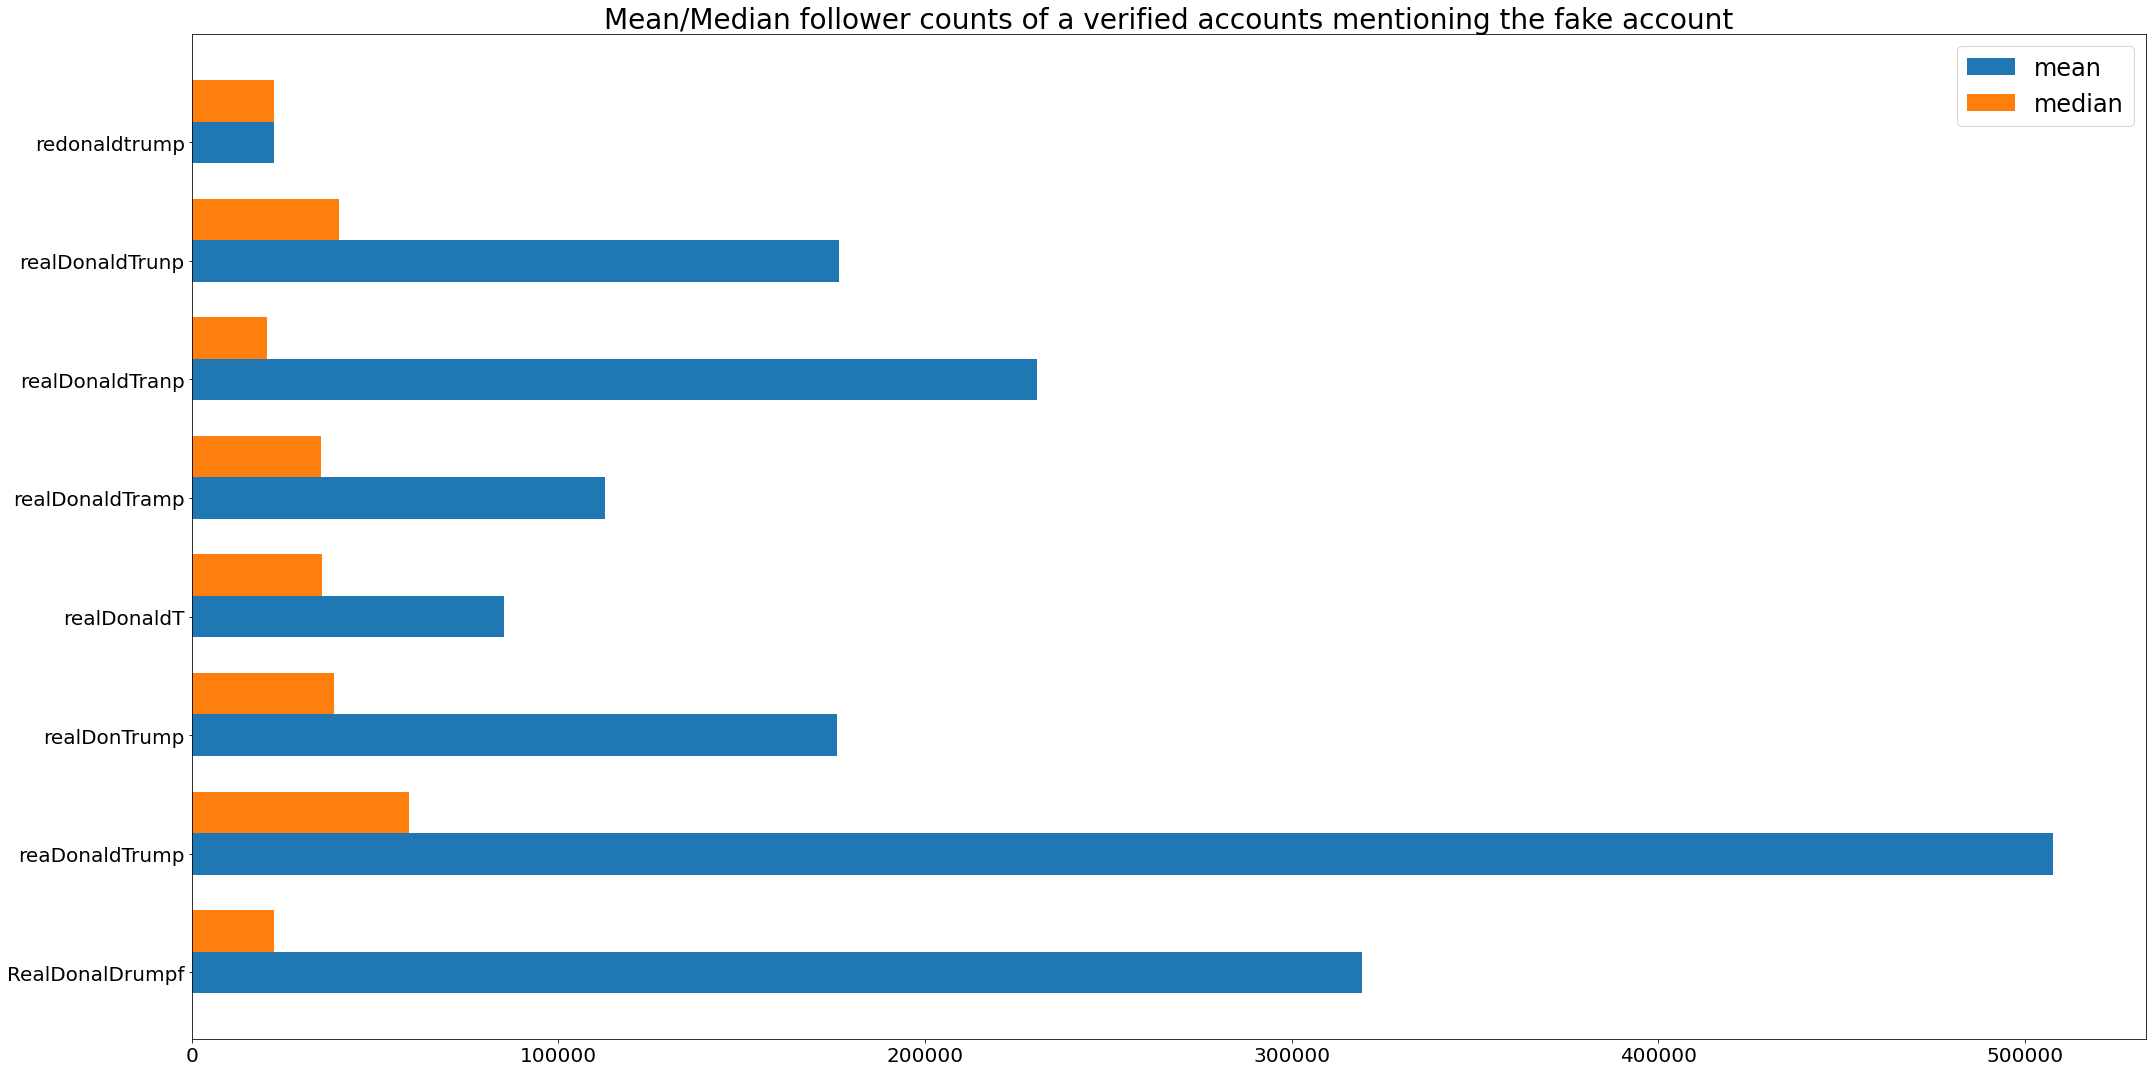

In [27]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(followers_per_verified_per_fake) )

labels = []
likes = []
retweets = []
responses = []

width = 0.35

for fake_account in sorted(followers_per_verified_per_fake):
    
    labels.append( fake_account )
    likes.append( np.mean( followers_per_verified_per_fake[fake_account] ) )
    retweets.append( np.median( followers_per_verified_per_fake[fake_account] ) )
    responses.append( np.mean )
                   
rects1 = ax.barh(x, means, width, label='mean')
rects2 = ax.barh(x + width, medians, width, label='median')

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

plt.title(
    "Mean/Median follower counts of a verified accounts mentioning the fake account",
    fontsize=28)
        
fig.tight_layout()

plt.show()


In [28]:
for fake_account in  warning_tweets_by_fake_account:
    
    print("{}: {}".format( fake_account, len(warning_tweets_by_fake_account[fake_account]) ) )

reaDonaldTrump: 14
realDonaldTranp: 1
realDonaldTrunp: 2
RealDonalDrumpf: 5
realDonTrump: 1


In [29]:
for fake_account in  total_tweets_per_fake_account:
    
    print("{}: {}".format( fake_account, total_tweets_per_fake_account[fake_account]) )

reaDonaldTrump: 698
redonaldtrump: 2
realDonaldTranp: 7
realDonaldTrunp: 84
realDonaldT: 26
realDonaldTramp: 61
RealDonalDrumpf: 406
realDonTrump: 71


In [30]:
for fake_account in nonwarning_tweets_by_fake_account:
    
    try:
    
        print("{}: {}".format(
            fake_account,
            len(warning_tweets_by_fake_account[fake_account]) / total_tweets_per_fake_account[fake_account] )
        )
        
    except KeyError:
        
        print("{}: {}".format(
            fake_account,
            0 )
        )
        

reaDonaldTrump: 0.02005730659025788
redonaldtrump: 0
realDonaldTranp: 0.14285714285714285
realDonaldTrunp: 0.023809523809523808
realDonaldT: 0
realDonaldTramp: 0
RealDonalDrumpf: 0.012315270935960592
realDonTrump: 0.014084507042253521


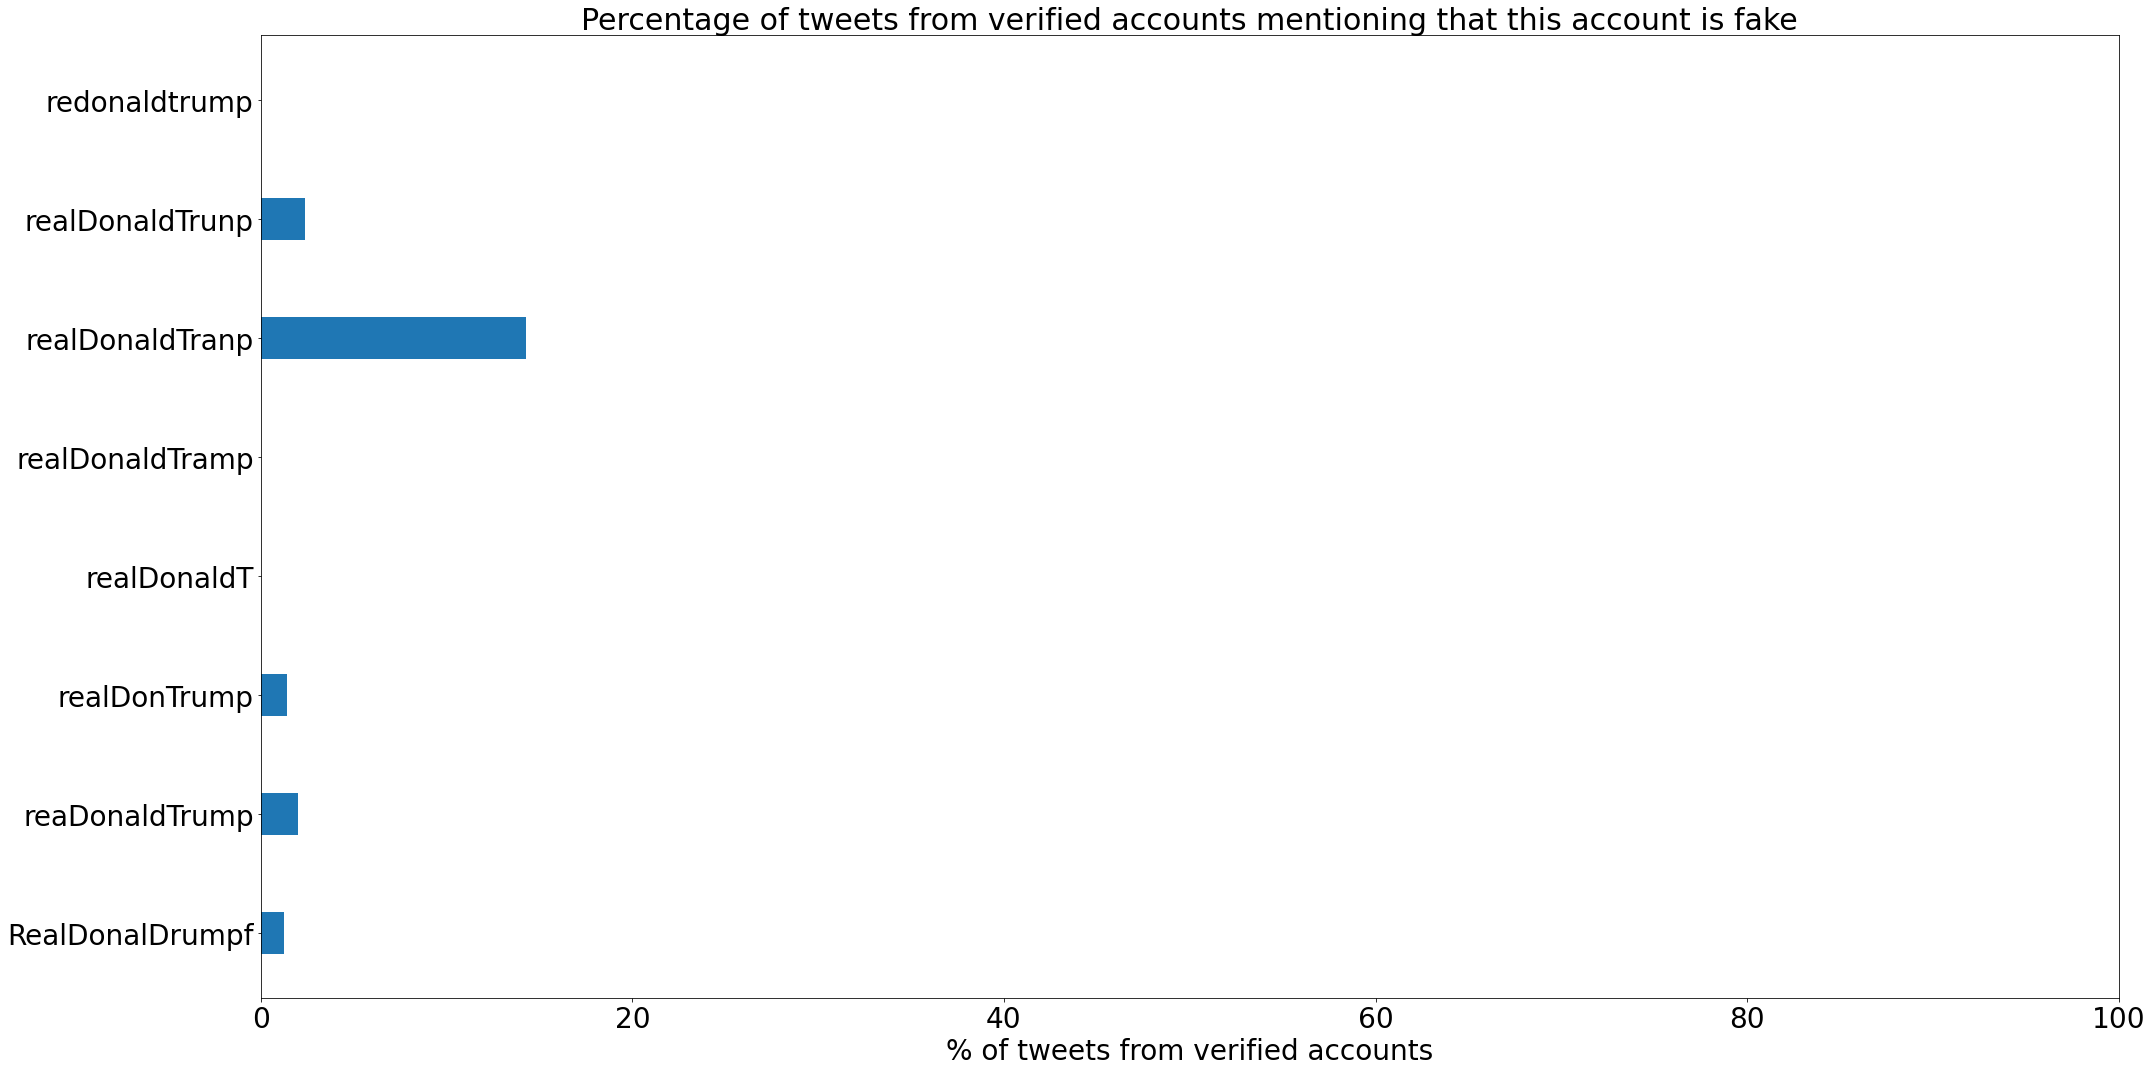

In [31]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(15)

x = np.arange( len(nonwarning_tweets_by_fake_account) )
y = []

labels = []
means = []
medians = []

width = 0.35

for fake_account in sorted(nonwarning_tweets_by_fake_account):
    
    labels.append( fake_account )
    
#     print()
#     print(fake_account)
    
    try:
#         print( len(warning_tweets_by_fake_account[fake_account]) / total_tweets_per_fake_account[fake_account] )
        y.append(
            len(warning_tweets_by_fake_account[fake_account]) / total_tweets_per_fake_account[fake_account] * 100 )
    except KeyError:
#         print(0)
        y.append( 0 )
                       
rects1 = ax.barh(x, y, width, label='mean')

ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)

# ax.set_xticks(x)
# plt.xticks(rotation='vertical')
# ax.set_xticklabels(labels, fontsize=20)
# ax.legend(fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(28) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(28) 

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{:.2f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',
#                    fontsize=18,
#                    backgroundcolor="w")

# autolabel(rects1)
# autolabel(rects2)

ax.set_xlim(0, 100)

plt.title(
    "Percentage of tweets from verified accounts mentioning that this account is fake",
    fontsize=30)

plt.xlabel("% of tweets from verified accounts", fontsize=28)
        
fig.tight_layout()

plt.show()


In [32]:
warning_verified_accounts

['joe_warmington',
 'jamessurowiecki',
 'gerberkawasaki',
 'jakesherman',
 'joyannreid',
 'jordanchariton',
 'lzgranderson',
 'lzgranderson',
 'charliespiering',
 'jonallendc',
 'matthewjdowd',
 'russzimmer',
 'kailijoy',
 'marcacaputo',
 'futureboy',
 'itssobhytime',
 'itssobhytime',
 'grady_booch',
 'pattyarquette',
 'lancegould',
 'thebolditalic',
 'kevinmkruse',
 'itssobhytime']

In [33]:
for fake_account in warning_retweets_by_fake_account:
    
    print("{}: {}".format( fake_account, np.mean( warning_retweets_by_fake_account[fake_account] ) ) )

reaDonaldTrump: 0.2857142857142857
realDonaldTranp: 0.0
realDonaldTrunp: 0.0
RealDonalDrumpf: 1.2
realDonTrump: 0.0


In [34]:
for fake_account in warning_retweets_by_fake_account:
    
    print("{}: {}".format( fake_account, np.median( warning_retweets_by_fake_account[fake_account] ) ) )

reaDonaldTrump: 0.0
realDonaldTranp: 0.0
realDonaldTrunp: 0.0
RealDonalDrumpf: 1.0
realDonTrump: 0.0


In [35]:
for fake_account in nonwarning_retweets_by_fake_account:
    
    print("{}: {}".format( fake_account, np.mean( nonwarning_retweets_by_fake_account[fake_account] ) ) )

reaDonaldTrump: 44.47514619883041
redonaldtrump: 0.5
realDonaldTranp: 0.8333333333333334
realDonaldTrunp: 36.75609756097561
realDonaldT: 2.923076923076923
realDonaldTramp: 5.60655737704918
RealDonalDrumpf: 2.0049875311720697
realDonTrump: 23.5


In [36]:
for fake_account in nonwarning_retweets_by_fake_account:
    
    print("{}: {}".format( fake_account, np.median( nonwarning_retweets_by_fake_account[fake_account] ) ) )

reaDonaldTrump: 1.0
redonaldtrump: 0.5
realDonaldTranp: 0.5
realDonaldTrunp: 1.0
realDonaldT: 0.5
realDonaldTramp: 0.0
RealDonalDrumpf: 0.0
realDonTrump: 1.0


In [37]:
table = []

headers = [
    "fake account",
    "mean # of retweets for verified accounts warning about fake account",
    "mean # of retweets for verified account not warning about fake account",
    "p-value"
]

for fake_account in nonwarning_retweets_by_fake_account:

    row = []
    row.append( fake_account )
    
    try:
        warning_retweets_mean = np.mean( warning_retweets_by_fake_account[fake_account] )
        warning_retweets_values = warning_retweets_by_fake_account[fake_account]
    except KeyError:
        # no records, so mean is 0
        warning_retweets_mean = 0
        warning_retweets_values = []
        

    nonwarning_retweets_mean = np.mean( nonwarning_retweets_by_fake_account[fake_account] )
    pvalue = stats.ttest_ind( 
        warning_retweets_values,
        nonwarning_retweets_by_fake_account[fake_account]
    )[1]
        
    
    row.append( warning_retweets_mean )
    row.append( nonwarning_retweets_mean )
    row.append( pvalue )
    
    table.append(row)
    
display(HTML(tabulate(table, headers, tablefmt="html")))

/Users/smj/.virtualenvs/web-archiving-forensics/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/smj/.virtualenvs/web-archiving-forensics/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fake account,mean # of retweets for verified accounts warning about fake account,mean # of retweets for verified account not warning about fake account,p-value
reaDonaldTrump,0.285714,44.4751,0.60015
redonaldtrump,0,0.5,nan
realDonaldTranp,0,0.833333,nan
realDonaldTrunp,0,36.7561,0.777192
realDonaldT,0,2.92308,nan
realDonaldTramp,0,5.60656,nan
RealDonalDrumpf,1.2,2.00499,0.837522
realDonTrump,0,23.5,nan


In [38]:
table = []

headers = [
    "fake account",
    "mean # of likes for verified accounts warning about fake account",
    "mean # of likes for verified account not warning about fake account",
    "p-value"
]

for fake_account in nonwarning_retweets_by_fake_account:

    row = []
    row.append( fake_account )
    
    try:
        warning_likes_mean = np.mean( warning_likes_by_fake_account[fake_account] )
        warning_likes_values = warning_likes_by_fake_account[fake_account]
    except KeyError:
        # no records, so mean is 0
        warning_likes_mean = 0
        warning_likes_values = []
        

    nonwarning_likes_mean = np.mean( nonwarning_likes_by_fake_account[fake_account] )
    pvalue = stats.ttest_ind( 
        warning_likes_values,
        nonwarning_likes_by_fake_account[fake_account]
    )[1]
    
    row.append( warning_likes_mean )
    row.append( nonwarning_likes_mean )
    row.append( pvalue )
    
    table.append(row)
    
display(HTML(tabulate(table, headers, tablefmt="html")))

fake account,mean # of likes for verified accounts warning about fake account,mean # of likes for verified account not warning about fake account,p-value
reaDonaldTrump,2.5,95.6257,0.570989
redonaldtrump,0,1.5,nan
realDonaldTranp,1,2.5,nan
realDonaldTrunp,3,157.634,0.778654
realDonaldT,0,8.53846,nan
realDonaldTramp,0,16.6885,nan
RealDonalDrumpf,3.2,5.89776,0.856859
realDonTrump,3,94.0429,nan


In [39]:
table = []

headers = [
    "fake account",
    "mean # of replies for verified accounts warning about fake account",
    "mean # of replies for verified account not warning about fake account",
    "p-value"
]

for fake_account in nonwarning_retweets_by_fake_account:

    row = []
    row.append( fake_account )
    
    try:
        warning_replies_mean = np.mean( warning_replies_by_fake_account[fake_account] )
        warning_replies_values = warning_replies_by_fake_account[fake_account]
    except KeyError:
        # no records, so mean is 0
        warning_replies_mean = 0
        warning_replies_values = []
        

    nonwarning_replies_mean = np.mean( nonwarning_replies_by_fake_account[fake_account] )
    pvalue = stats.ttest_ind( 
        warning_replies_values,
        nonwarning_replies_by_fake_account[fake_account]
    )[1]
    
    row.append( warning_replies_mean )
    row.append( nonwarning_replies_mean )
    row.append( pvalue )
    
    table.append(row)
    
display(HTML(tabulate(table, headers, tablefmt="html")))

fake account,mean # of replies for verified accounts warning about fake account,mean # of replies for verified account not warning about fake account,p-value
reaDonaldTrump,1.21429,8.90205,0.465345
redonaldtrump,0,0,nan
realDonaldTranp,1,0.166667,nan
realDonaldTrunp,0,7.70732,0.658291
realDonaldT,0,1.23077,nan
realDonaldTramp,0,1.06557,nan
RealDonalDrumpf,0.8,0.600998,0.812008
realDonTrump,0,4.95714,nan


## Fake account notices over time

In [40]:
warning_tweets_for_fake_account_by_year = {}

for fake_account in nonwarning_tweets_by_fake_account:
    
    warning_tweets_for_fake_account_by_year.setdefault(fake_account, {})
    
    for year in range(2010, 2021):
        
        warning_tweets_for_fake_account_by_year[fake_account].setdefault(year, [])

for fake_account in nonwarning_tweets_by_fake_account:
    
    if fake_account in warning_tweets_by_fake_account:
    
        for tweet in warning_tweets_by_fake_account[fake_account]:

            year = int(tweet['created_at'].split('-')[0])

            warning_tweets_for_fake_account_by_year[fake_account][year].append(tweet)


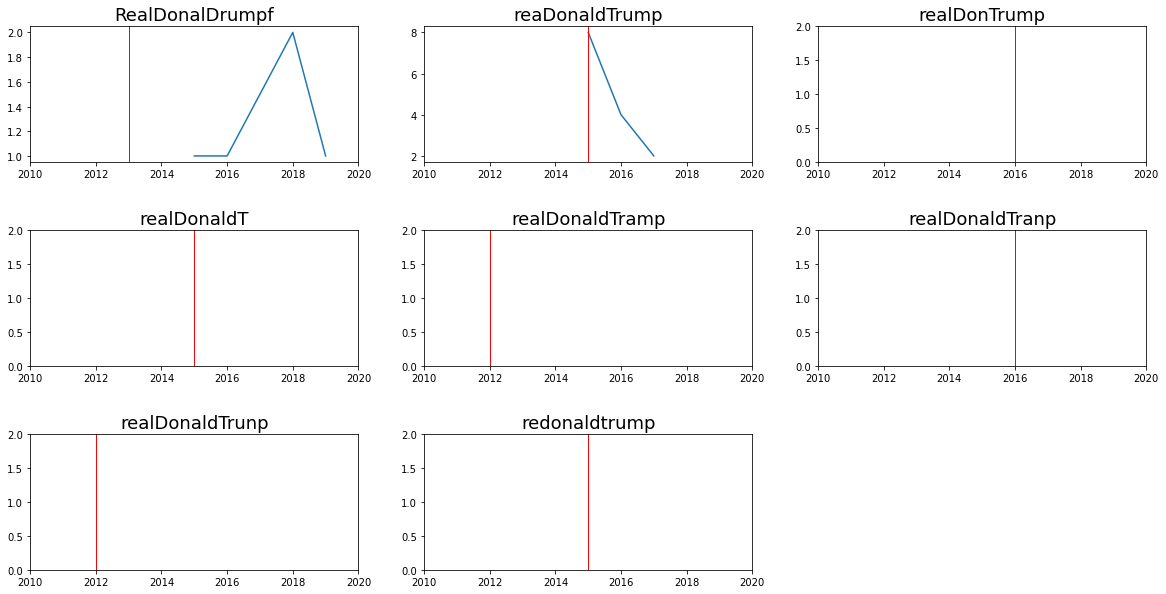

In [41]:
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(10)

figcounter = 0
row = 0
col = 0

account_creation_year = {
    "RealDonalDrumpf": 2013,
    "reaDonaldTrump": 2015,
    "realDonTrump": 2016,
    "realDonaldT": 2015,
    "realDonaldTrunp": 2012,
    "realDonaldTramp": 2012,
    "realDonaldTranp": 2016,
    "redonaldtrump": 2015
}

for fake_account_name in sorted(warning_tweets_for_fake_account_by_year):

    x = []
    y = []
    
    for year in warning_tweets_for_fake_account_by_year[fake_account_name]:
        
        tweet_count = len( warning_tweets_for_fake_account_by_year[fake_account_name][year] )        
        
        if tweet_count > 0:
            x.append(year)
            y.append( tweet_count )
            
    
    # vertical line for account creation date

    axs[row, col].plot(x, y)
    axs[row, col].set_xlim( 2010, 2020 )
    if len(y) <= 1:
        axs[row, col].set_ylim(0, 2)
#     else:
#         axs[row, col].set_ylim(0)
#     axs[row, col].set_ylim( 0, 400 )
    axs[row, col].set_title(fake_account_name, fontsize=18)
    axs[row, col].xaxis.label.set_fontsize(16)
    axs[row, col].axvline(x=account_creation_year[fake_account_name], linewidth=1, color='r')

    col += 1
    
    if col == 3:
        row += 1
        col = 0
        
    figcounter += 1
    
axs[2, 2].set_visible(False)
plt.subplots_adjust(hspace=0.5)

In [42]:
len( warning_tweets_for_fake_account_by_year[fake_account_name][year] )

0

# Languages in use by these accounts

This did not make it into the slides. I observed early on that it seemed like @realDonaldTranp was tweeted by non-English languages, but this did not pan out.

In [43]:
languages_per_fake_account = {}

skiplist = [
    'realDonaldTrump'
]



for filename in os.listdir('../verified-account-data/'):
    
    if filename[-5:] == '.json':
        
        fake_account_name = filename.split('.')[0]
        
        if fake_account_name in skiplist:
            continue
        
        with jsonlines.open('../verified-account-data/' + filename) as f:
            
            for obj in f:
            
                languages_per_fake_account.setdefault( fake_account_name, [] ).append(obj ['language'] )


In [44]:
lang_counts_per_fake_account = {}

all_lang = []

for fake_account in languages_per_fake_account:
    
    for lang in languages_per_fake_account[fake_account]:
        
        lang_counts_per_fake_account.setdefault( fake_account, {} )
        lang_counts_per_fake_account[fake_account].setdefault( lang, 0 )
        lang_counts_per_fake_account[fake_account][lang] += 1
        
        all_lang.append(lang)
        
all_lang = list(set(all_lang))

In [45]:
lang_counts_per_fake_account

{'reaDonaldTrump': {'en': 610,
  'es': 62,
  'ru': 1,
  'fr': 4,
  'de': 4,
  'und': 10,
  'in': 2,
  'pt': 1,
  'zh': 1,
  'nl': 2,
  'sl': 1},
 'redonaldtrump': {'en': 2},
 'realDonaldTranp': {'it': 1, 'en': 6},
 'realDonaldTrunp': {'es': 2, 'en': 80, 'und': 2},
 'realDonaldT': {'en': 19, 'es': 1, 'pt': 1, 'fr': 3, 'de': 2},
 'realDonaldTramp': {'und': 8,
  'es': 1,
  'en': 45,
  'ru': 2,
  'tr': 2,
  'tl': 1,
  'ar': 1,
  'ca': 1},
 'RealDonalDrumpf': {'en': 324,
  'und': 64,
  'tl': 1,
  'es': 7,
  'ca': 2,
  'de': 3,
  'zh': 2,
  'it': 1,
  'in': 1,
  'sv': 1},
 'realDonTrump': {'es': 4, 'en': 66, 'und': 1}}

In [46]:
sorted(all_lang)

['ar',
 'ca',
 'de',
 'en',
 'es',
 'fr',
 'in',
 'it',
 'nl',
 'pt',
 'ru',
 'sl',
 'sv',
 'tl',
 'tr',
 'und',
 'zh']

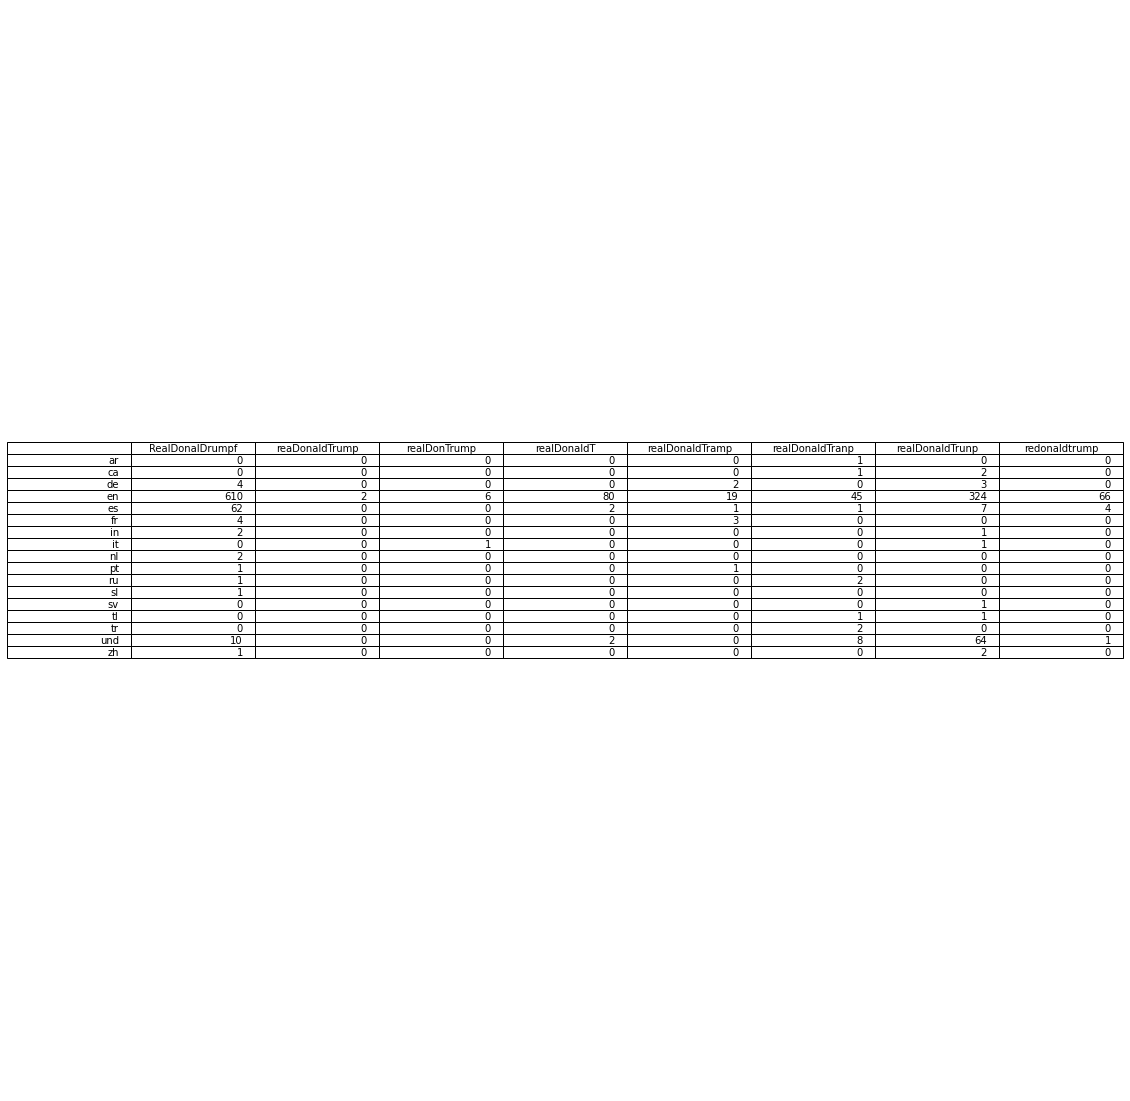

In [47]:
columns = [''] + sorted(lang_counts_per_fake_account.keys())
rows = list( sorted(lang_counts_per_fake_account.keys()) )

cell_text = []
colors = []

for lang in sorted(all_lang):
    
    row = []
    row.append(lang)
    
    rowcolors = []
    rowcolors.append("w")

    for fake_account in lang_counts_per_fake_account:
        
        rowcolors.append("w")
        
        try:
            row.append( lang_counts_per_fake_account[fake_account][lang] )
        except KeyError:
            row.append(0)
    
    cell_text.append( row )
    colors.append( rowcolors )


# Add a table at the bottom of the axes
# colors = [["#56b5fd","w","w","w","w"],[ "#1ac3f5","w","w","w","w"]]

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
# ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text,cellColours=colors,
                     colLabels=columns,loc='center')

plt.show()

In [48]:
list( sorted(lang_counts_per_fake_account.keys()) )

['RealDonalDrumpf',
 'reaDonaldTrump',
 'realDonTrump',
 'realDonaldT',
 'realDonaldTramp',
 'realDonaldTranp',
 'realDonaldTrunp',
 'redonaldtrump']